# 4 CB Exploratory Visuals

### This script contains the following points
#### 01 Import Libraries
#### 02 Import Data
#### 03 First Look at Data
#### 04 Visualizations
#### 05 Questions

# 01 Import Libraries

In [3]:
# Import Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib
import seaborn as sns
import scipy

### 01 Check matplotlib version

In [4]:
matplotlib.__version__

'3.7.2'

# 02 Import Data

In [5]:
# Set a path

path = r'C:\Users\Tina\Desktop\CareerFoundry\Data Analytics Immersion\Chocolate Bar Rating'

In [6]:
# Import "checked_chocolate_bars"

choco_check = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'checked_chocolate_bars.csv'))

# 03 First Look at Data

In [7]:
# Shape of "choco_check"

choco_check.shape

(1722, 10)

In [8]:
# First few rows of "choco_check"

choco_check.head()

,Unnamed: 0,company,bar_name,ref,review_date,cocoa_percent,company_location,rating,bean_type,bean_origin
0,0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,,Sao Tome
1,1,A. Morin,Kpime,1676,2015,70.0,France,2.75,,Togo
2,2,A. Morin,Atsane,1676,2015,70.0,France,3.00,,Togo
3,3,A. Morin,Akata,1680,2015,70.0,France,3.50,,Togo
4,4,A. Morin,Quilla,1704,2015,70.0,France,3.50,,Peru


In [9]:
# Drop "Unnamed: 0" column

choco_check = choco_check.drop(columns =['Unnamed: 0'])

In [10]:
choco_check.head()

,company,bar_name,ref,review_date,cocoa_percent,company_location,rating,bean_type,bean_origin
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70.0,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,,Peru


# 04 Visualizations

### 01 Correlation Matrix Heatmap

In [54]:
# Create a subset with the variables I want to check for correlation

choco_sub = choco_check[['cocoa_percent', 'rating']]

Text(0.5, 1.0, "Correlation Heatmap of Chocolate Bars' Amount of Cocoa and their Ratings")

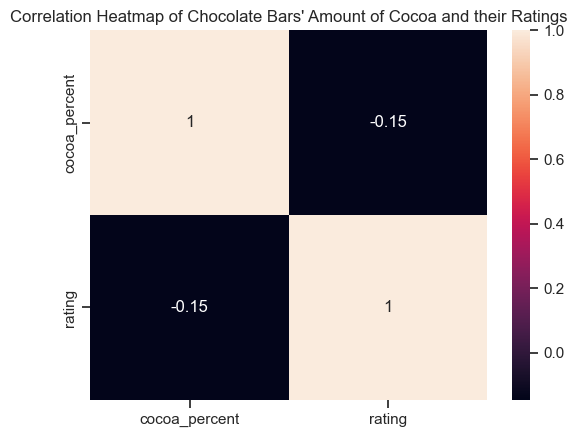

In [55]:
# Create a correlation matrix heatmap

corr = sns.heatmap(choco_sub.corr(), annot = True)
plt.title("Correlation Heatmap of Chocolate Bars' Amount of Cocoa and their Ratings")

There are only two variables in this dataset that can be used for the correlation matrix heatmap.
The two variables "cocoa_percent" and "rating" have a weak negative correlation.
This means that when the cocoa percentage increases, the rating slightly decreases.

### 02 Scatterplot

C:\Users\Tina\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, "Relationship between  Chocolate Bars' Amount of Cocoa and their Ratings")

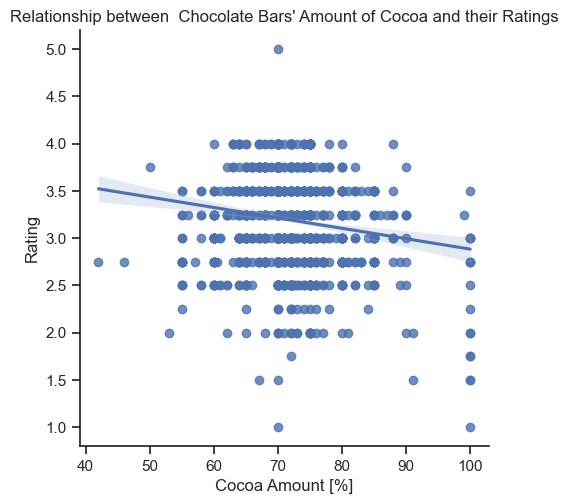

In [56]:
# Create a scatterplot of "cocoa_percent" and 'rating'

sns.lmplot(x = 'cocoa_percent', y = 'rating', data = choco_sub)
plt.xlabel("Cocoa Amount [%]")
plt.ylabel("Rating")
plt.title("Relationship between  Chocolate Bars' Amount of Cocoa and their Ratings")

As can be seen in this scatterplot, there is no trend that can be observed between these two variables.
The percentage of cocoa in a chocolate bar does not predict the rating the bar will get. But it can be seen that most ratings are between 2.0 and 4.0. And there seems to be only one chocolate bar with a rating of 5.0.
It's also interesting to note that chocolare bars with 100% cocoa got a wide variety of ratings from about 1.0 to 3.5.

### 03 Pair Plot

C:\Users\Tina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Tina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Tina\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 0.98, "Pair Plot of Chocolate Bars' Amount of Cocoa and their Ratings")

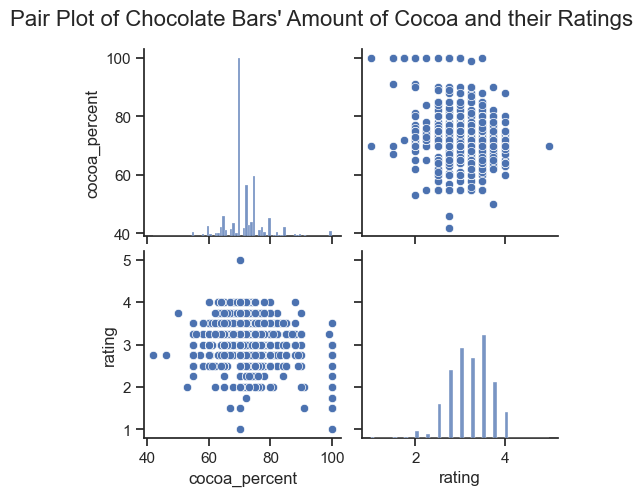

In [57]:
# Create a pair plot 

pair = sns.pairplot(choco_sub)
plt.subplots_adjust(top=0.9)
pair.fig.suptitle("Pair Plot of Chocolate Bars' Amount of Cocoa and their Ratings", fontsize=16)

Again there are only the same two variables that can be used in the pair plot. And the result is therefore the same scatterplot.
It is interesting to see that a cocoa percentage of about 70 seems to be present with the highest frequency compared to other cocoa percentages.

### 04 Categorical Plot

C:\Users\Tina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of the Amount of Cocoa')

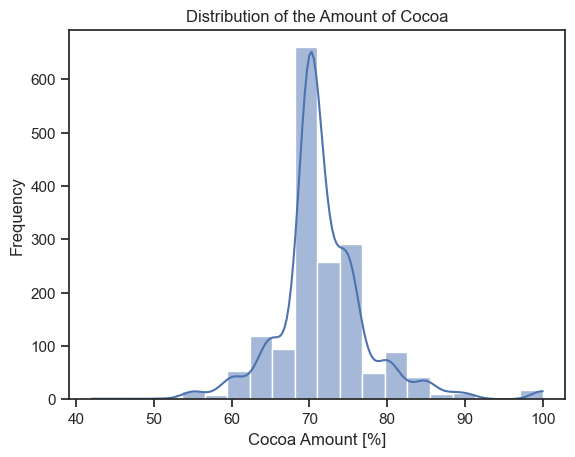

In [50]:
# Create a histogram to see the distribution of "cocoa_percentage"

sns.histplot(choco_sub['cocoa_percent'], bins = 20, kde = True)
plt.xlabel("Cocoa Amount [%]")
plt.ylabel("Frequency")
plt.title("Distribution of the Amount of Cocoa")

In [42]:
# Create categories

choco_sub.loc[choco_sub['cocoa_percent'] <= 60, 'cocoa_content'] = 'Low amount'
choco_sub.loc[(choco_sub['cocoa_percent'] > 60) & (choco_sub['cocoa_percent'] <=80), 'cocoa_content'] = 'Middle amount'
choco_sub.loc[choco_sub['cocoa_percent'] > 80, 'cocoa_content'] = 'High amount'

In [44]:
# Check the categories

choco_sub['cocoa_content'].value_counts(dropna = False)

cocoa_content
Middle amount    1555
High amount       102
Low amount         65
Name: count, dtype: int64

C:\Users\Tina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Tina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Tina\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


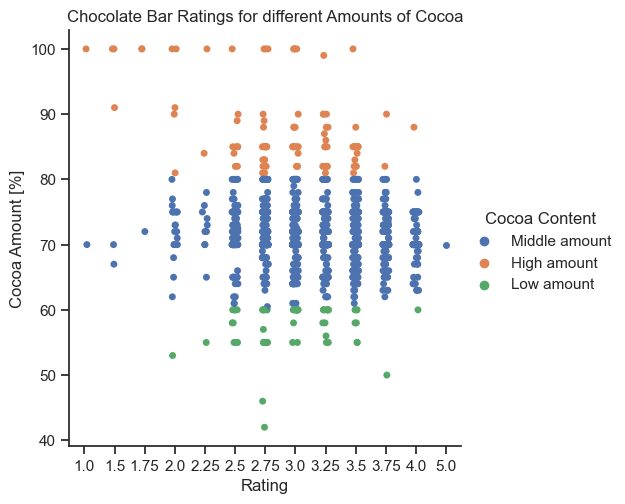

In [49]:
# Create a categorical plot using the cocoa content categories created above

sns.set(style="ticks")
category = sns.catplot(x="rating", y="cocoa_percent", hue="cocoa_content", data=choco_sub)
plt.xlabel("Rating")
plt.ylabel("Cocoa Amount [%]")
plt.title("Chocolate Bar Ratings for different Amounts of Cocoa")
category._legend.set_title("Cocoa Content")

Most ratings are for chocolate bars with a middle amount of cocoa whereas the least ratings are for chocolate bars with a low amount of cocoa.

# 05 Questions

Based on these visuals only the following question can be answered:

##### What relationship do the cocoa content and the rating have?

And the answer is that there is no clear trend that can be seen. The amount of cocoa in a chocolate bar does not predict the rating the chocolate bar will get.

A hypothesis that can be formed at this point is:

##### There is no relationship between a chocolate bar's amount of cocoa and its rating.